libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from statsmodels.tsa.stattools import acf, ccf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics import utils
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
import pandas as pd
from statsmodels.graphics.api import qqplot

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter
from scipy.stats import multivariate_normal


saved object files

In [3]:
readcsv_GenMix_2018_2022=pd.read_csv(r"..\ImportData\GenMix_2018_2022.csv")

In [5]:
GenMix_nanremoved = pd.read_pickle('GenMix_nanremoved.pkl')

In [4]:
GenMix_Consolidated = pd.read_pickle('GenMix_Consolidated.pkl')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
GenMix_train, GenMix_test = train_test_split(GenMix_nanremoved,train_size = .01,shuffle= False)

In [12]:
import pickle

In [13]:
filename = 'CGS_2Latent_KF.pkl'

infile = open(filename,'rb')
CGS_2Latent_KF = pickle.load(infile)
infile.close()


In [14]:
filename = 'CGS_3Latent_KF.pkl'
infile = open(filename,'rb')
CGS_3Latent_KF = pickle.load(infile)
infile.close()


In [82]:
def print_parameters(kf_model, need_params=None):
    """
    Function that prints out the parameters for a Kalman Filter
    @param - kf_model : the model object
    @param - need_params : a list of string
    """
    if need_params is None:
        need_params = ['transition_matrices', 'observation_matrices', 'transition_offsets', 
                  'observation_offsets', 'transition_covariance', 
                  'observation_covariance', 'initial_state_mean', 'initial_state_covariance']
    for param in need_params: 
        print("{0} = {1}, shape = {2}\n".format(param, getattr(kf_model, param), getattr(kf_model, param).shape))

In [ ]:
filename = 'KF_CGS_3Latent_allfit.pkl'
infile = open(filename,'rb')
KF_CGS_3Latent_allfit = pickle.load(infile)
infile.close()


## Gen Fuel Mix Analysis
### Kalman Filter

First check for NaN's and time gaps.

Set training data to subset of data

First try unsupervised Kalman - dimension of Latents?

Combine fuel types into one category

Try some unsupervised Kalman filters


To do/hopes:

Try supervised Kalman, use some columns as latents and others as observations - self as latent, market as observation?
self as latent, total as observation? Load?

Fit EM, with only the M step, like in the HMM lab

Then see if can infer latents for training data or testing data, and see if matches the columns

Try with Load-normalized - only percent fuel mix.

Try to find and Import data: natural gas prices, wind speed, diesel prices? Use generation on outage data for nuclear and hydro

In [4]:
readcsv_GenMix_2018_2022=pd.read_csv(r"..\ImportData\GenMix_2018_2022.csv")

Check NaNs

In [ ]:
#https://stackoverflow.com/questions/14247586/how-to-select-rows-with-one-or-more-nulls-from-a-pandas-dataframe-without-listin

In [4]:
readcsv_GenMix_2018_2022

,GMT MKT Interval,Coal Market,Coal Self,Diesel Fuel Oil Market,Diesel Fuel Oil Self,Hydro Market,Hydro Self,Natural Gas Market,Natural Gas Self,Nuclear Market,...,Solar Self,Waste Disposal Services Market,Waste Disposal Services Self,Wind Market,Wind Self,Waste Heat Market,Waste Heat Self,Other Market,Other Self,Load
0,2018-01-01T06:00:00Z,2948.5,18203.9,0.0,4.4,43.1,759.6,5903.9,3447.6,0.0,...,0.0,0.0,10.8,0.0,3643.1,0.0,0.0,0.0,27.1,36439.754
1,2018-01-01T06:05:00Z,2917.3,18191.4,0.0,4.4,43.3,775.3,5842.2,3468.0,0.0,...,0.0,0.0,10.9,0.0,3619.8,0.0,0.0,0.0,27.3,36389.511
2,2018-01-01T06:10:00Z,2916.5,18181.4,0.0,0.0,43.8,802.2,5983.2,3479.6,0.0,...,0.0,0.0,11.0,0.0,3578.9,0.0,0.0,0.0,27.0,36386.829
3,2018-01-01T06:15:00Z,2913.0,18159.0,0.0,0.0,43.8,776.5,6116.0,3385.1,0.0,...,0.0,0.0,10.9,0.0,3539.2,0.0,0.0,0.0,26.9,36290.426
4,2018-01-01T06:20:00Z,2911.5,18154.1,0.0,0.0,43.3,713.7,6182.6,3438.3,0.0,...,0.0,0.0,10.9,0.0,3515.1,0.0,0.0,0.0,27.3,36225.646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503655,2022-10-16T21:40:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503656,2022-10-16T21:45:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503657,2022-10-16T21:50:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503658,2022-10-16T21:55:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
GenMix_nans =  readcsv_GenMix_2018_2022[readcsv_GenMix_2018_2022.isnull().any(axis=1)]

In [16]:
GenMix_nans

,GMT MKT Interval,Coal Market,Coal Self,Diesel Fuel Oil Market,Diesel Fuel Oil Self,Hydro Market,Hydro Self,Natural Gas Market,Natural Gas Self,Nuclear Market,...,Solar Self,Waste Disposal Services Market,Waste Disposal Services Self,Wind Market,Wind Self,Waste Heat Market,Waste Heat Self,Other Market,Other Self,Load
105891,2020-01-04T18:45:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106157,2020-01-05T16:55:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108449,2020-01-13T15:55:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109329,2020-01-16T17:15:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109487,2020-01-17T06:25:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398535,2022-10-16T21:40:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398536,2022-10-16T21:45:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398537,2022-10-16T21:50:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398538,2022-10-16T21:55:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
1154/398540 

0.0028955688262156873

In [39]:
398540-1154

397386

In [38]:
397386

397386

less than .2%

<AxesSubplot:>

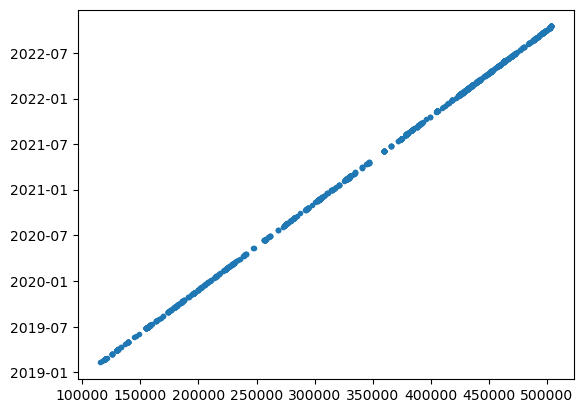

In [6]:
pd.to_datetime(GenMix_nans['GMT MKT Interval']).plot(style = ".")

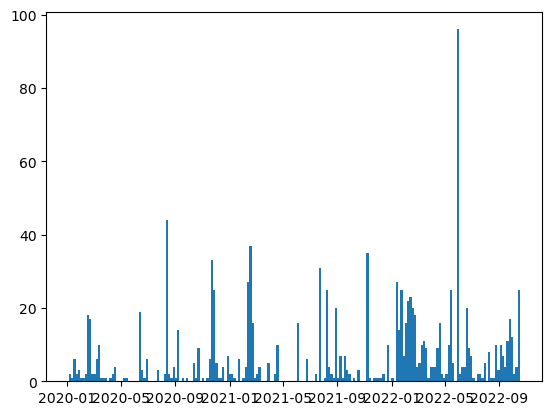

In [33]:
plt.hist(pd.to_datetime(GenMix_nans['GMT MKT Interval']),bins = 200)
plt.show()

In [32]:
GenMix_nans.iloc[200]

GMT MKT Interval                   2020-10-20T20:15:00Z
 Coal Market                                        NaN
 Coal Self                                          NaN
 Diesel Fuel Oil Market                             NaN
 Diesel Fuel Oil Self                               NaN
 Hydro Market                                       NaN
 Hydro Self                                         NaN
 Natural Gas Market                                 NaN
 Natural Gas Self                                   NaN
 Nuclear Market                                     NaN
 Nuclear Self                                       NaN
 Solar Market                                       NaN
 Solar Self                                         NaN
 Waste Disposal Services Market                     NaN
 Waste Disposal Services Self                       NaN
 Wind Market                                        NaN
 Wind Self                                          NaN
 Waste Heat Market                              

#### Remove NaNs

Just remove NaNs. Other options: interpolate, fill? Can introduce differences in training and test sets.

In [7]:
GenMix_nanremoved = readcsv_GenMix_2018_2022.dropna()

In [37]:
GenMix_nanremoved

,GMT MKT Interval,Coal Market,Coal Self,Diesel Fuel Oil Market,Diesel Fuel Oil Self,Hydro Market,Hydro Self,Natural Gas Market,Natural Gas Self,Nuclear Market,...,Solar Self,Waste Disposal Services Market,Waste Disposal Services Self,Wind Market,Wind Self,Waste Heat Market,Waste Heat Self,Other Market,Other Self,Load
0,2018-01-01T06:00:00Z,2948.5,18203.9,0.0,4.4,43.1,759.6,5903.9,3447.6,0.0,...,0.0,0.0,10.8,0.0,3643.1,0.0,0.0,0.0,27.1,36439.754
1,2018-01-01T06:05:00Z,2917.3,18191.4,0.0,4.4,43.3,775.3,5842.2,3468.0,0.0,...,0.0,0.0,10.9,0.0,3619.8,0.0,0.0,0.0,27.3,36389.511
2,2018-01-01T06:10:00Z,2916.5,18181.4,0.0,0.0,43.8,802.2,5983.2,3479.6,0.0,...,0.0,0.0,11.0,0.0,3578.9,0.0,0.0,0.0,27.0,36386.829
3,2018-01-01T06:15:00Z,2913.0,18159.0,0.0,0.0,43.8,776.5,6116.0,3385.1,0.0,...,0.0,0.0,10.9,0.0,3539.2,0.0,0.0,0.0,26.9,36290.426
4,2018-01-01T06:20:00Z,2911.5,18154.1,0.0,0.0,43.3,713.7,6182.6,3438.3,0.0,...,0.0,0.0,10.9,0.0,3515.1,0.0,0.0,0.0,27.3,36225.646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398517,2022-10-16T20:10:00Z,6245.0,1986.5,0.0,0.0,23.4,925.4,5397.8,529.7,0.0,...,40.7,2.5,6.2,0.0,11384.6,0.0,0.0,0.0,19.8,27022.455
398518,2022-10-16T20:15:00Z,6282.1,1976.4,0.0,0.0,23.7,925.8,5306.1,468.4,0.0,...,37.5,2.6,6.2,0.0,11391.8,0.0,0.0,0.0,19.7,27030.275
398519,2022-10-16T20:20:00Z,6228.8,1972.4,0.0,0.0,24.0,926.9,5130.1,413.6,0.0,...,38.5,2.5,6.2,0.0,11504.9,0.0,0.0,0.0,19.7,26973.540
398520,2022-10-16T20:25:00Z,6190.3,2065.0,0.0,0.0,23.8,926.1,4926.5,432.7,0.0,...,34.0,2.5,6.1,0.0,11662.7,0.0,0.0,0.0,19.6,26975.018


In [52]:
GenMix_nanremoved.columns

Index(['GMT MKT Interval', ' Coal Market', ' Coal Self',
       ' Diesel Fuel Oil Market', ' Diesel Fuel Oil Self', ' Hydro Market',
       ' Hydro Self', ' Natural Gas Market', ' Natural Gas Self',
       ' Nuclear Market', ' Nuclear Self', ' Solar Market', ' Solar Self',
       ' Waste Disposal Services Market', ' Waste Disposal Services Self',
       ' Wind Market', ' Wind Self', ' Waste Heat Market', ' Waste Heat Self',
       ' Other Market', ' Other Self', ' Load'],
      dtype='object')

In [8]:
GenMix_nanremoved.columns = GenMix_nanremoved.columns.str.removeprefix(' ')  # strip blank space


In [54]:
GenMix_nanremoved.columns

Index(['GMT MKT Interval', 'Coal Market', 'Coal Self',
       'Diesel Fuel Oil Market', 'Diesel Fuel Oil Self', 'Hydro Market',
       'Hydro Self', 'Natural Gas Market', 'Natural Gas Self',
       'Nuclear Market', 'Nuclear Self', 'Solar Market', 'Solar Self',
       'Waste Disposal Services Market', 'Waste Disposal Services Self',
       'Wind Market', 'Wind Self', 'Waste Heat Market', 'Waste Heat Self',
       'Other Market', 'Other Self', 'Load'],
      dtype='object')

#### Add datetime

In [9]:
GenMix_nanremoved['datetime'] = pd.to_datetime(GenMix_nanremoved['GMT MKT Interval'])

C:\Users\chen5\AppData\Local\Temp\ipykernel_20576\273917358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GenMix_nanremoved['datetime'] = pd.to_datetime(GenMix_nanremoved['GMT MKT Interval'])


In [10]:
GenMix_nanremoved

,GMT MKT Interval,Coal Market,Coal Self,Diesel Fuel Oil Market,Diesel Fuel Oil Self,Hydro Market,Hydro Self,Natural Gas Market,Natural Gas Self,Nuclear Market,...,Waste Disposal Services Market,Waste Disposal Services Self,Wind Market,Wind Self,Waste Heat Market,Waste Heat Self,Other Market,Other Self,Load,datetime
0,2018-01-01T06:00:00Z,2948.5,18203.9,0.0,4.4,43.1,759.6,5903.9,3447.6,0.0,...,0.0,10.8,0.0,3643.1,0.0,0.0,0.0,27.1,36439.754,2018-01-01 06:00:00+00:00
1,2018-01-01T06:05:00Z,2917.3,18191.4,0.0,4.4,43.3,775.3,5842.2,3468.0,0.0,...,0.0,10.9,0.0,3619.8,0.0,0.0,0.0,27.3,36389.511,2018-01-01 06:05:00+00:00
2,2018-01-01T06:10:00Z,2916.5,18181.4,0.0,0.0,43.8,802.2,5983.2,3479.6,0.0,...,0.0,11.0,0.0,3578.9,0.0,0.0,0.0,27.0,36386.829,2018-01-01 06:10:00+00:00
3,2018-01-01T06:15:00Z,2913.0,18159.0,0.0,0.0,43.8,776.5,6116.0,3385.1,0.0,...,0.0,10.9,0.0,3539.2,0.0,0.0,0.0,26.9,36290.426,2018-01-01 06:15:00+00:00
4,2018-01-01T06:20:00Z,2911.5,18154.1,0.0,0.0,43.3,713.7,6182.6,3438.3,0.0,...,0.0,10.9,0.0,3515.1,0.0,0.0,0.0,27.3,36225.646,2018-01-01 06:20:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503637,2022-10-16T20:10:00Z,6245.0,1986.5,0.0,0.0,23.4,925.4,5397.8,529.7,0.0,...,2.5,6.2,0.0,11384.6,0.0,0.0,0.0,19.8,27022.455,2022-10-16 20:10:00+00:00
503638,2022-10-16T20:15:00Z,6282.1,1976.4,0.0,0.0,23.7,925.8,5306.1,468.4,0.0,...,2.6,6.2,0.0,11391.8,0.0,0.0,0.0,19.7,27030.275,2022-10-16 20:15:00+00:00
503639,2022-10-16T20:20:00Z,6228.8,1972.4,0.0,0.0,24.0,926.9,5130.1,413.6,0.0,...,2.5,6.2,0.0,11504.9,0.0,0.0,0.0,19.7,26973.540,2022-10-16 20:20:00+00:00
503640,2022-10-16T20:25:00Z,6190.3,2065.0,0.0,0.0,23.8,926.1,4926.5,432.7,0.0,...,2.5,6.1,0.0,11662.7,0.0,0.0,0.0,19.6,26975.018,2022-10-16 20:25:00+00:00


In [11]:
GenMix_nanremoved.to_pickle('GenMix_nanremoved.pkl')

In [12]:
GenMix_nanremoved = pd.read_pickle('GenMix_nanremoved.pkl')

#### Consolidate fuel types

In [69]:
GenMix_nanremoved.describe()

,Coal Market,Coal Self,Diesel Fuel Oil Market,Diesel Fuel Oil Self,Hydro Market,Hydro Self,Natural Gas Market,Natural Gas Self,Nuclear Market,Nuclear Self,...,Solar Self,Waste Disposal Services Market,Waste Disposal Services Self,Wind Market,Wind Self,Waste Heat Market,Waste Heat Self,Other Market,Other Self,Load
count,397386.000000,397386.000000,397386.000000,397386.000000,397386.000000,397386.000000,397386.000000,397386.000000,397386.0,397386.000000,...,397386.000000,397386.00000,397386.000000,397386.0,397386.000000,397386.0,397386.0,397386.000000,397386.000000,397386.000000
mean,5669.973172,5613.653485,5.359370,10.903138,106.809079,1149.026741,6387.066520,737.921667,0.0,1802.158779,...,67.332552,0.16530,10.964648,0.0,9765.288385,0.0,0.0,0.088204,27.016094,30963.252147
std,3401.260789,3625.498014,39.644281,25.218404,92.937222,484.341406,3740.949044,463.039960,0.0,411.100202,...,82.915860,0.54214,1.916365,0.0,4944.124139,0.0,0.0,0.934260,6.740218,5768.260723
min,265.000000,463.900000,0.000000,0.000000,0.000000,132.500000,422.900000,57.700000,0.0,0.000000,...,0.000000,0.00000,1.000000,0.0,147.200000,0.0,0.0,-10.000000,0.000000,26.555000
25%,2932.200000,2990.200000,0.000000,0.000000,40.600000,749.200000,3533.100000,396.400000,0.0,1850.900000,...,0.000000,0.00000,9.800000,0.0,5554.300000,0.0,0.0,0.000000,23.500000,27079.788750
50%,4836.900000,4545.300000,0.000000,0.000000,70.700000,1179.100000,5595.650000,633.200000,0.0,1989.200000,...,3.100000,0.00000,11.500000,0.0,9546.800000,0.0,0.0,0.000000,27.500000,29574.312500
75%,7931.850000,7244.450000,0.000000,3.000000,155.600000,1524.000000,8479.000000,950.800000,0.0,2031.700000,...,156.800000,0.00000,12.500000,0.0,13664.600000,0.0,0.0,0.000000,31.700000,33621.186500
max,16447.200000,19369.700000,944.200000,317.600000,580.700000,2398.500000,22913.800000,4172.000000,0.0,2053.600000,...,229.800000,4.70000,19.400000,0.0,22882.100000,0.0,0.0,58.600000,114.300000,52979.235000


In [70]:
GenMix_nanremoved.describe().loc['mean'].sort_values()

Solar Market                          0.000000
Wind Market                           0.000000
Waste Heat Self                       0.000000
Nuclear Market                        0.000000
Waste Heat Market                     0.000000
Other Market                          0.088204
Waste Disposal Services Market        0.165300
Diesel Fuel Oil Market                5.359370
Diesel Fuel Oil Self                 10.903138
Waste Disposal Services Self         10.964648
Other Self                           27.016094
Solar Self                           67.332552
Hydro Market                        106.809079
Natural Gas Self                    737.921667
Hydro Self                         1149.026741
Nuclear Self                       1802.158779
Coal Self                          5613.653485
Coal Market                        5669.973172
Natural Gas Market                 6387.066520
Wind Self                          9765.288385
Load                              30963.252147
Name: mean, d

Be aware that load is a column

Wind, Natural Gas, Coal, Nuclear, Hydro - Major
Solar, Waste Disposal/Heat, Diesel Fuel Oil, Other less important

In [15]:
GenMix_Consolidated = GenMix_nanremoved[['GMT MKT Interval','datetime']].copy()

In [61]:
GenMix_Consolidated

,GMT MKT Interval,datetime
0,2018-01-01T06:00:00Z,2018-01-01 06:00:00+00:00
1,2018-01-01T06:05:00Z,2018-01-01 06:05:00+00:00
2,2018-01-01T06:10:00Z,2018-01-01 06:10:00+00:00
3,2018-01-01T06:15:00Z,2018-01-01 06:15:00+00:00
4,2018-01-01T06:20:00Z,2018-01-01 06:20:00+00:00
...,...,...
398517,2022-10-16T20:10:00Z,2022-10-16 20:10:00+00:00
398518,2022-10-16T20:15:00Z,2022-10-16 20:15:00+00:00
398519,2022-10-16T20:20:00Z,2022-10-16 20:20:00+00:00
398520,2022-10-16T20:25:00Z,2022-10-16 20:25:00+00:00


In [16]:
for fuel in ['Coal', 'Natural Gas', 'Wind', 'Hydro','Nuclear']:
    GenMix_Consolidated[fuel +' Total'] = GenMix_nanremoved[fuel+' Market'] + GenMix_nanremoved[fuel+' Self']

In [17]:
GenMix_Consolidated

,GMT MKT Interval,datetime,Coal Total,Natural Gas Total,Wind Total,Hydro Total,Nuclear Total
0,2018-01-01T06:00:00Z,2018-01-01 06:00:00+00:00,21152.4,9351.5,3643.1,802.7,2033.8
1,2018-01-01T06:05:00Z,2018-01-01 06:05:00+00:00,21108.7,9310.2,3619.8,818.6,2034.4
2,2018-01-01T06:10:00Z,2018-01-01 06:10:00+00:00,21097.9,9462.8,3578.9,846.0,2034.0
3,2018-01-01T06:15:00Z,2018-01-01 06:15:00+00:00,21072.0,9501.1,3539.2,820.3,2034.4
4,2018-01-01T06:20:00Z,2018-01-01 06:20:00+00:00,21065.6,9620.9,3515.1,757.0,2034.5
...,...,...,...,...,...,...,...
503637,2022-10-16T20:10:00Z,2022-10-16 20:10:00+00:00,8231.5,5927.5,11384.6,948.8,0.0
503638,2022-10-16T20:15:00Z,2022-10-16 20:15:00+00:00,8258.5,5774.5,11391.8,949.5,0.0
503639,2022-10-16T20:20:00Z,2022-10-16 20:20:00+00:00,8201.2,5543.7,11504.9,950.9,0.0
503640,2022-10-16T20:25:00Z,2022-10-16 20:25:00+00:00,8255.3,5359.2,11662.7,949.9,0.0


In [18]:
GenMix_Consolidated.to_pickle('GenMix_Consolidated.pkl')

In [ ]:
GenMix_Consolidated = pd.read_pickle('GenMix_Consolidated.pkl')

In [85]:
GenMix_Consolidated.describe()

,Coal Total,Natural Gas Total,Wind Total,Hydro Total,Nuclear Total
count,397386.000000,397386.000000,397386.000000,397386.000000,397386.000000
mean,11283.626657,7124.988187,9765.288385,1255.835820,1802.158779
std,4248.884154,3915.357442,4944.124139,528.313569,411.100202
min,1447.800000,789.500000,147.200000,165.900000,0.000000
25%,7942.500000,4134.800000,5554.300000,814.600000,1850.900000
50%,11053.900000,6304.800000,9546.800000,1275.500000,1989.200000
75%,14532.600000,9282.275000,13664.600000,1663.200000,2031.700000
max,22619.000000,23759.800000,22882.100000,2658.400000,2053.600000


In [62]:
GenMix_nanremoved.columns

Index(['GMT MKT Interval', 'Coal Market', 'Coal Self',
       'Diesel Fuel Oil Market', 'Diesel Fuel Oil Self', 'Hydro Market',
       'Hydro Self', 'Natural Gas Market', 'Natural Gas Self',
       'Nuclear Market', 'Nuclear Self', 'Solar Market', 'Solar Self',
       'Waste Disposal Services Market', 'Waste Disposal Services Self',
       'Wind Market', 'Wind Self', 'Waste Heat Market', 'Waste Heat Self',
       'Other Market', 'Other Self', 'Load', 'datetime'],
      dtype='object')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
GenMix_train, GenMix_test = train_test_split(GenMix_nanremoved,train_size = .01,shuffle= False)

In [18]:
GenMix_cons_train, GenMix_cons_test = train_test_split(GenMix_Consolidated,train_size = .01,shuffle= False)


In [77]:
GenMix_train

,GMT MKT Interval,Coal Market,Coal Self,Diesel Fuel Oil Market,Diesel Fuel Oil Self,Hydro Market,Hydro Self,Natural Gas Market,Natural Gas Self,Nuclear Market,...,Waste Disposal Services Market,Waste Disposal Services Self,Wind Market,Wind Self,Waste Heat Market,Waste Heat Self,Other Market,Other Self,Load,datetime
0,2018-01-01T06:00:00Z,2948.5,18203.9,0.0,4.4,43.1,759.6,5903.9,3447.6,0.0,...,0.0,10.8,0.0,3643.1,0.0,0.0,0.0,27.1,36439.754,2018-01-01 06:00:00+00:00
1,2018-01-01T06:05:00Z,2917.3,18191.4,0.0,4.4,43.3,775.3,5842.2,3468.0,0.0,...,0.0,10.9,0.0,3619.8,0.0,0.0,0.0,27.3,36389.511,2018-01-01 06:05:00+00:00
2,2018-01-01T06:10:00Z,2916.5,18181.4,0.0,0.0,43.8,802.2,5983.2,3479.6,0.0,...,0.0,11.0,0.0,3578.9,0.0,0.0,0.0,27.0,36386.829,2018-01-01 06:10:00+00:00
3,2018-01-01T06:15:00Z,2913.0,18159.0,0.0,0.0,43.8,776.5,6116.0,3385.1,0.0,...,0.0,10.9,0.0,3539.2,0.0,0.0,0.0,26.9,36290.426,2018-01-01 06:15:00+00:00
4,2018-01-01T06:20:00Z,2911.5,18154.1,0.0,0.0,43.3,713.7,6182.6,3438.3,0.0,...,0.0,10.9,0.0,3515.1,0.0,0.0,0.0,27.3,36225.646,2018-01-01 06:20:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3968,2018-01-15T01:10:00Z,2917.4,15729.4,0.0,0.0,35.4,1411.4,4029.7,1503.7,0.0,...,0.0,13.0,0.0,6444.2,0.0,0.0,0.0,27.0,33511.990,2018-01-15 01:10:00+00:00
3969,2018-01-15T01:15:00Z,2917.2,15740.8,0.0,0.0,39.8,1412.7,3979.7,1399.1,0.0,...,0.0,12.9,0.0,6626.1,0.0,0.0,0.0,26.1,33474.269,2018-01-15 01:15:00+00:00
3970,2018-01-15T01:20:00Z,2916.1,15701.3,0.0,0.0,55.8,1392.9,3839.7,1322.5,0.0,...,0.0,12.9,0.0,6907.1,0.0,0.0,0.0,26.7,33558.423,2018-01-15 01:20:00+00:00
3971,2018-01-15T01:25:00Z,2875.8,15578.2,0.0,0.0,56.3,1396.5,3772.8,1287.8,0.0,...,0.0,13.0,0.0,7205.9,0.0,0.0,0.0,26.1,33688.850,2018-01-15 01:25:00+00:00


For now, train on small part of data to see if viable, two weeks.

In [78]:
GenMix_train

,GMT MKT Interval,Coal Market,Coal Self,Diesel Fuel Oil Market,Diesel Fuel Oil Self,Hydro Market,Hydro Self,Natural Gas Market,Natural Gas Self,Nuclear Market,...,Waste Disposal Services Market,Waste Disposal Services Self,Wind Market,Wind Self,Waste Heat Market,Waste Heat Self,Other Market,Other Self,Load,datetime
0,2018-01-01T06:00:00Z,2948.5,18203.9,0.0,4.4,43.1,759.6,5903.9,3447.6,0.0,...,0.0,10.8,0.0,3643.1,0.0,0.0,0.0,27.1,36439.754,2018-01-01 06:00:00+00:00
1,2018-01-01T06:05:00Z,2917.3,18191.4,0.0,4.4,43.3,775.3,5842.2,3468.0,0.0,...,0.0,10.9,0.0,3619.8,0.0,0.0,0.0,27.3,36389.511,2018-01-01 06:05:00+00:00
2,2018-01-01T06:10:00Z,2916.5,18181.4,0.0,0.0,43.8,802.2,5983.2,3479.6,0.0,...,0.0,11.0,0.0,3578.9,0.0,0.0,0.0,27.0,36386.829,2018-01-01 06:10:00+00:00
3,2018-01-01T06:15:00Z,2913.0,18159.0,0.0,0.0,43.8,776.5,6116.0,3385.1,0.0,...,0.0,10.9,0.0,3539.2,0.0,0.0,0.0,26.9,36290.426,2018-01-01 06:15:00+00:00
4,2018-01-01T06:20:00Z,2911.5,18154.1,0.0,0.0,43.3,713.7,6182.6,3438.3,0.0,...,0.0,10.9,0.0,3515.1,0.0,0.0,0.0,27.3,36225.646,2018-01-01 06:20:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3968,2018-01-15T01:10:00Z,2917.4,15729.4,0.0,0.0,35.4,1411.4,4029.7,1503.7,0.0,...,0.0,13.0,0.0,6444.2,0.0,0.0,0.0,27.0,33511.990,2018-01-15 01:10:00+00:00
3969,2018-01-15T01:15:00Z,2917.2,15740.8,0.0,0.0,39.8,1412.7,3979.7,1399.1,0.0,...,0.0,12.9,0.0,6626.1,0.0,0.0,0.0,26.1,33474.269,2018-01-15 01:15:00+00:00
3970,2018-01-15T01:20:00Z,2916.1,15701.3,0.0,0.0,55.8,1392.9,3839.7,1322.5,0.0,...,0.0,12.9,0.0,6907.1,0.0,0.0,0.0,26.7,33558.423,2018-01-15 01:20:00+00:00
3971,2018-01-15T01:25:00Z,2875.8,15578.2,0.0,0.0,56.3,1396.5,3772.8,1287.8,0.0,...,0.0,13.0,0.0,7205.9,0.0,0.0,0.0,26.1,33688.850,2018-01-15 01:25:00+00:00


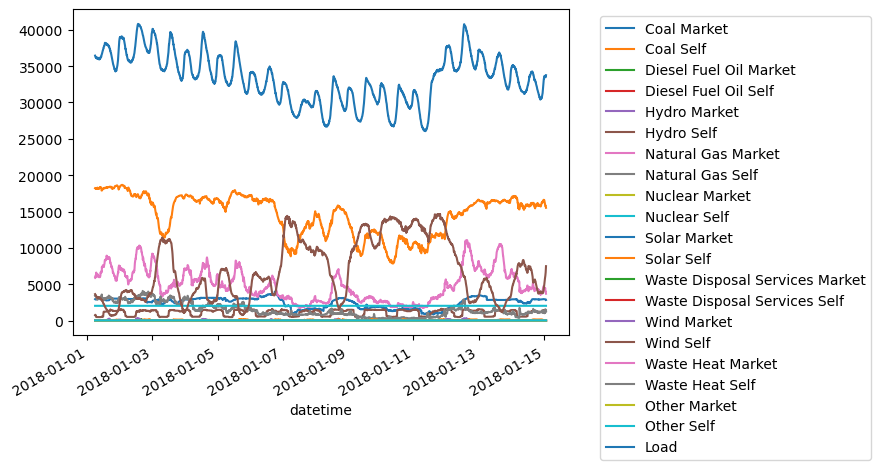

In [98]:
GenMix_train.plot(x = "datetime")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

<AxesSubplot:xlabel='datetime'>

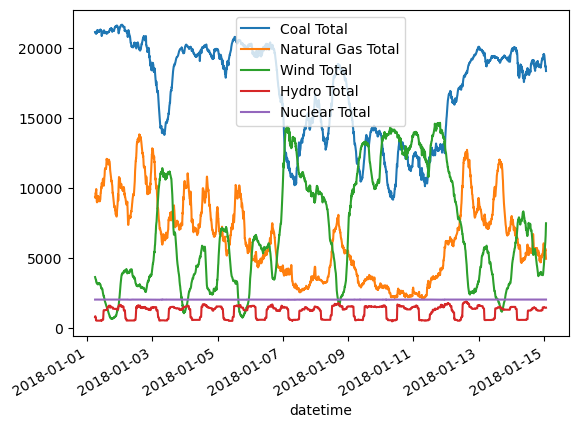

In [87]:
GenMix_cons_train.plot(x = "datetime")

In [107]:
GenMix_cons_test[:393413//10]

,GMT MKT Interval,datetime,Coal Total,Natural Gas Total,Wind Total,Hydro Total,Nuclear Total
3973,2018-01-15T01:35:00Z,2018-01-15 01:35:00+00:00,18265.4,4923.1,7675.6,1449.2,2036.6
3974,2018-01-15T01:40:00Z,2018-01-15 01:40:00+00:00,18069.3,4913.4,7894.9,1449.1,2034.8
3975,2018-01-15T01:45:00Z,2018-01-15 01:45:00+00:00,17849.4,4893.4,8126.1,1451.0,2036.2
3976,2018-01-15T01:50:00Z,2018-01-15 01:50:00+00:00,17673.4,4842.2,8350.4,1445.7,2036.7
3977,2018-01-15T01:55:00Z,2018-01-15 01:55:00+00:00,17639.3,4792.6,8529.9,1447.7,2037.0
...,...,...,...,...,...,...,...
43309,2018-05-31T23:45:00Z,2018-05-31 23:45:00+00:00,17505.3,20164.7,1462.5,1972.7,1202.0
43310,2018-05-31T23:50:00Z,2018-05-31 23:50:00+00:00,17492.0,20151.7,1426.1,1970.7,1202.0
43311,2018-05-31T23:55:00Z,2018-05-31 23:55:00+00:00,17523.5,19906.6,1468.7,1931.6,1202.0
43312,2018-06-01T00:00:00Z,2018-06-01 00:00:00+00:00,17516.6,19781.7,1468.8,1867.4,1202.0


<AxesSubplot:xlabel='datetime'>

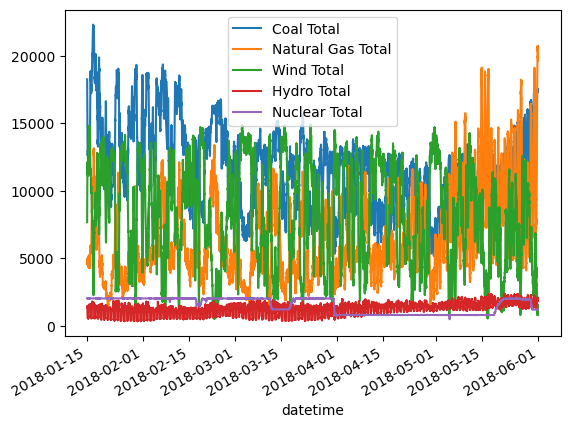

In [108]:
GenMix_cons_test[:393413//10].plot(x = "datetime")

Hydro cyclic, follows load?

Use load, self as latents?

Nuclear is constant

#### Kalman Filter
Try a kalman filter

#### KF 1
Do on Coal, Gas and Wind 3 columns, with 3 latents

In [96]:
# Just do three columns for now, ~4000 rows
GenMix_cons_train.columns[2:5]

Index(['Coal Total', 'Natural Gas Total', 'Wind Total'], dtype='object')

In [34]:
data = GenMix_cons_train[GenMix_cons_train.columns[2:5]]

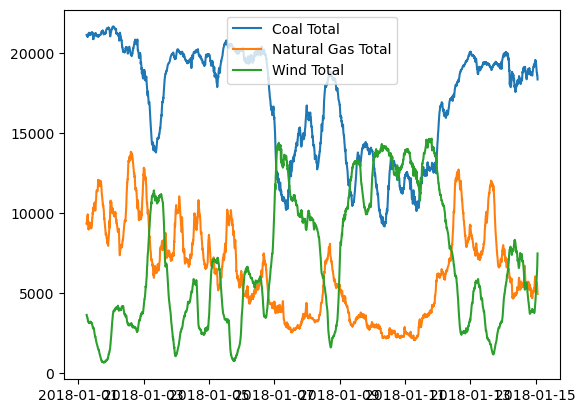

In [132]:
plt.plot(GenMix_cons_train['datetime'],data)
plt.legend(data.columns)
plt.show()

<AxesSubplot:>

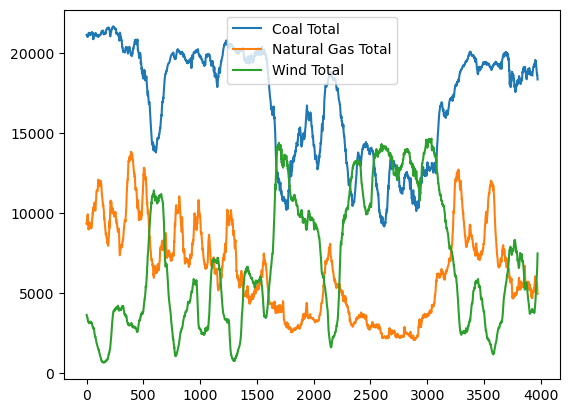

In [143]:
data.plot()

In [142]:
kf = KalmanFilter(n_dim_state=data.shape[1], n_dim_obs=data.shape[1])


If something has iterations, do on a very small portion first and test runtime

In [144]:
import time
start = time.process_time()
# your code here    
print(time.process_time() - start)


0.0


In [145]:
start = time.process_time()

kf.em(data, n_iter=10)

print(time.process_time() - start)


33.0625


Took 33 seconds

In [36]:
filtered_state_means, filtered_state_covariances = kf.filter(data)


Try smoothing

In [101]:
(smoothed_state_means, smoothed_state_covariances) = kf.smooth(data)

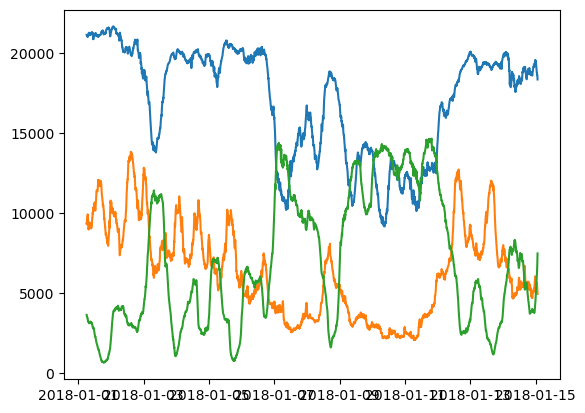

In [109]:
plt.plot(GenMix_cons_train['datetime'],data)

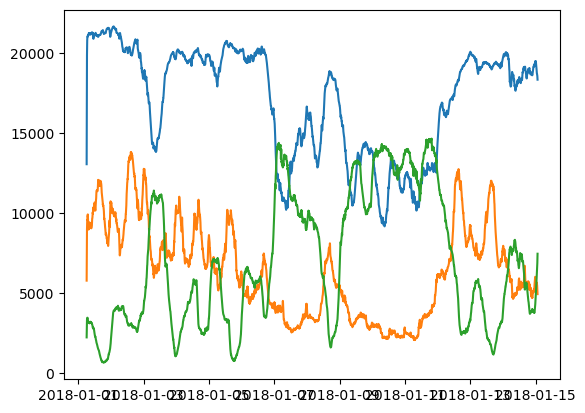

In [147]:
plt.plot(GenMix_cons_train['datetime'],filtered_state_means)

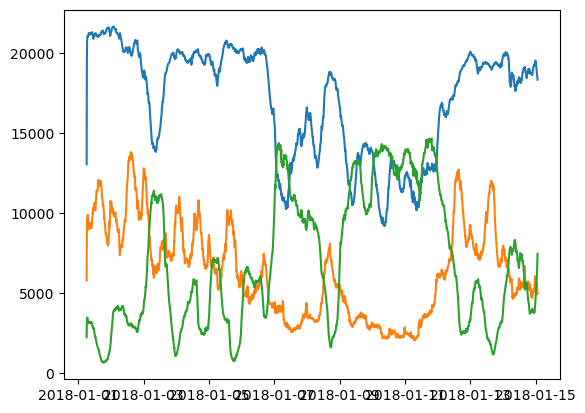

In [102]:
plt.plot(GenMix_cons_train['datetime'],smoothed_state_means)

Smoothing looks pretty similar

Examine residuals of filtered means minus actuals:

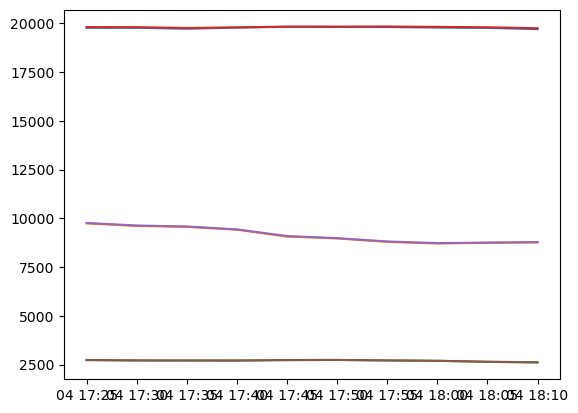

In [70]:
ii = 1000
jj = 1010
plt.plot(GenMix_cons_train['datetime'][ii:jj],data[ii:jj])
plt.plot(GenMix_cons_train['datetime'][ii:jj],filtered_state_means[ii:jj])
plt.show()

Coal Total


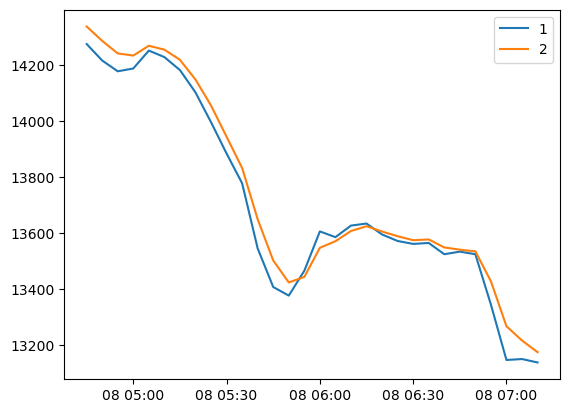

In [80]:
ii = 2000
jj = 2030
kk = 0
print(data.columns[kk])
plt.plot(GenMix_cons_train['datetime'][ii:jj],data[ii:jj][data.columns[kk]],label = "1")
plt.plot(GenMix_cons_train['datetime'][ii:jj],filtered_state_means[ii:jj,kk], label = "2")
plt.legend()
plt.show()

In [63]:
filtered_state_means

array([[13062.17773491,  5787.11713038,  2241.52174121],
       [16083.24285402,  7110.28475547,  2751.72689051],
       [18554.75694921,  8339.46793713,  3140.91251873],
       ...,
       [18576.24550856,  5156.67599524,  6887.02451867],
       [18445.57865411,  5058.51824066,  7189.36071473],
       [18343.82893918,  4946.15414257,  7468.89767806]])

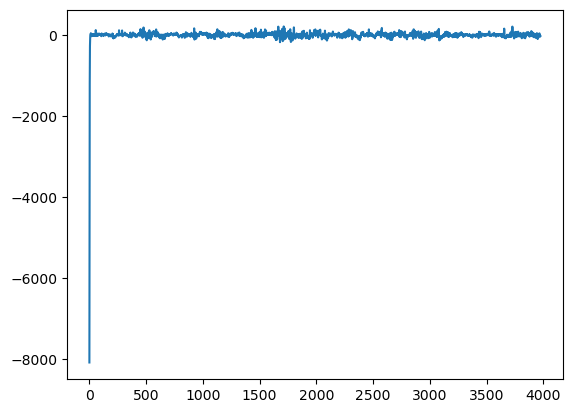

In [45]:
plt.plot(filtered_state_means[:,0]-data[data.columns[0]])

In [55]:
filtered_state_means.shape

(3973, 3)

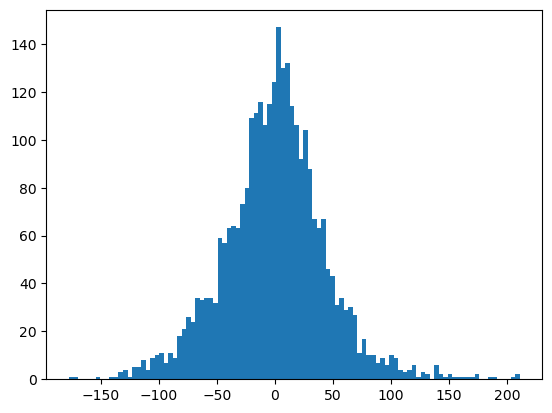

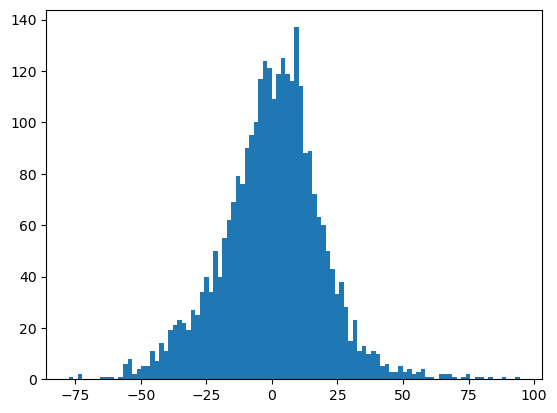

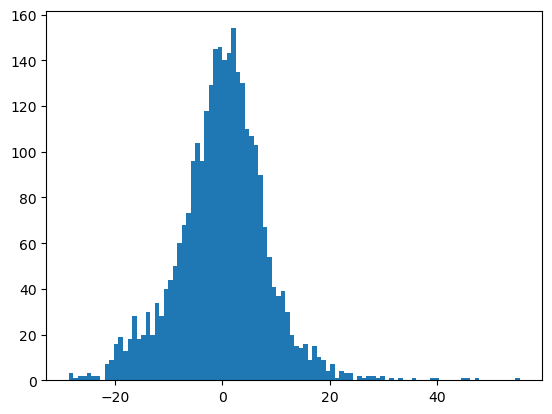

In [56]:
for i in range(3):
    plt.hist((filtered_state_means[:,i]-data[data.columns[i]])[1000:],100)
    plt.show()

In [82]:
def print_parameters(kf_model, need_params=None):
    """
    Function that prints out the parameters for a Kalman Filter
    @param - kf_model : the model object
    @param - need_params : a list of string
    """
    if need_params is None:
        need_params = ['transition_matrices', 'observation_matrices', 'transition_offsets', 
                  'observation_offsets', 'transition_covariance', 
                  'observation_covariance', 'initial_state_mean', 'initial_state_covariance']
    for param in need_params: 
        print("{0} = {1}, shape = {2}\n".format(param, getattr(kf_model, param), getattr(kf_model, param).shape))

In [149]:
print_parameters(kf)

transition_matrices = [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape = (3, 3)

observation_matrices = [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape = (3, 3)

transition_offsets = [0. 0. 0.], shape = (3,)

observation_offsets = [0. 0. 0.], shape = (3,)

transition_covariance = [[22494.2792516   8385.96692565   681.55883035]
 [ 8385.96692565 12554.5202376   -625.91955101]
 [  681.55883035  -625.91955101  6518.14546623]], shape = (3, 3)

observation_covariance = [[34569.1107895  15010.96842622  5817.11585468]
 [15010.96842622  7220.40941567  2505.09088407]
 [ 5817.11585468  2505.09088407  1316.26195923]], shape = (3, 3)

initial_state_mean = [13062.10901461  5787.08779436  2241.47470285], shape = (3,)

initial_state_covariance = [[ 3.81527901e-01  6.40064478e-04  5.18932939e-04]
 [ 6.40064478e-04  3.80500022e-01 -9.54326242e-05]
 [ 5.18932939e-04 -9.54326242e-05  3.78969667e-01]], shape = (3, 3)



Results in trivial dynamics and observations, latents match observations.

In [150]:
filename = 'CGS_3Latent_KF.pkl'
outfile = open(filename,'wb')
pickle.dump(kf,outfile)
outfile.close()


In [35]:
kf = CGS_3Latent_KF

#### KF 2
Do on same 3 columns, 2 latents

In [122]:
kf = KalmanFilter(n_dim_state=2, n_dim_obs=data.shape[1])


In [125]:
%timeit kf.em(data, n_iter=1)


5.14 s ± 803 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [126]:
kf.em(data, n_iter=10)

In [127]:
filtered_state_means, filtered_state_covariances = kf.filter(data)


In [128]:
filtered_state_covariances

array([[[3.80966202e-01, 1.94476414e-03],
        [1.94476414e-03, 3.77463604e-01]],

       [[1.39487746e+04, 6.05502811e+03],
        [6.05502811e+03, 3.05304159e+03]],

       [[1.80087012e+04, 7.83550493e+03],
        [7.83550493e+03, 3.83466730e+03]],

       ...,

       [[1.91478981e+04, 8.33513079e+03],
        [8.33513079e+03, 4.05379328e+03]],

       [[1.91478981e+04, 8.33513079e+03],
        [8.33513079e+03, 4.05379328e+03]],

       [[1.91478981e+04, 8.33513079e+03],
        [8.33513079e+03, 4.05379328e+03]]])

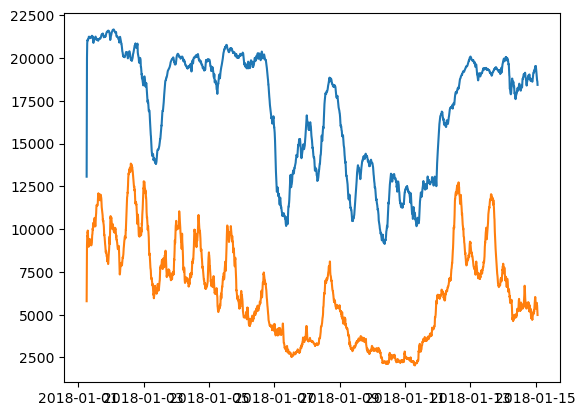

In [129]:
plt.plot(GenMix_cons_train['datetime'],filtered_state_means)

In [81]:
print_parameters(kf)

NameError: name 'print_parameters' is not defined

Still gets trivial solution, but doesn't match wind now.

In [138]:
import pickle

In [139]:
# Save model with pickle
# https://scikit-learn.org/stable/model_persistence.html
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
# https://www.datacamp.com/tutorial/pickle-python-tutorial
filename = 'CGS_2Latent_KF.pkl'
outfile = open(filename,'wb')
pickle.dump(kf,outfile)
outfile.close()


In [140]:
filename = 'CGS_2Latent_KF.pkl'

infile = open(filename,'rb')
CGS_2Latent_KF = pickle.load(infile)
infile.close()


In [141]:
print_parameters(CGS_2Latent_KF)

transition_matrices = [[1. 0.]
 [0. 1.]], shape = (2, 2)

observation_matrices = [[1. 0.]
 [0. 1.]
 [0. 0.]], shape = (3, 2)

transition_offsets = [0. 0.], shape = (2,)

observation_offsets = [0. 0. 0.], shape = (3,)

transition_covariance = [[23404.75313162  8852.25579277]
 [ 8852.25579277 12852.5119537 ]], shape = (2, 2)

observation_covariance = [[3.56685280e+04 1.55707466e+04 2.21070221e+05]
 [1.55707466e+04 7.24177060e+03 9.47824914e+04]
 [2.21070221e+05 9.47824914e+04 6.69779772e+07]], shape = (3, 3)

initial_state_mean = [13063.65680437  5787.40597476], shape = (2,)

initial_state_covariance = [[0.38103124 0.00180532]
 [0.00180532 0.37778305]], shape = (2, 2)



Try to predict/get observations from the latents.

Want to say what are the observation means from the filtered latents? What is the magnitude of the noises? How does it predict future states?

Sample?

https://pykalman.github.io/#optimizing-parameters

PyKalman documentation

Optimizing Parameters: "It is customary optimize only the transition_covariance, observation_covariance, initial_state_mean, and initial_state_covariance, which is the default when em_vars is unspecified."


So need to specify if want to optimize transition_matrices and observation_matrices. Can set = 'all'

In [ ]:
kf_ex = KalmanFilter(em_vars=['transition_covariance', 'observation_covariance'])


In [ ]:
kf_ex = KalmanFilter(em_vars='all')


In [25]:
GenMix_cons_train

,GMT MKT Interval,datetime,Coal Total,Natural Gas Total,Wind Total,Hydro Total,Nuclear Total
0,2018-01-01T06:00:00Z,2018-01-01 06:00:00+00:00,21152.4,9351.5,3643.1,802.7,2033.8
1,2018-01-01T06:05:00Z,2018-01-01 06:05:00+00:00,21108.7,9310.2,3619.8,818.6,2034.4
2,2018-01-01T06:10:00Z,2018-01-01 06:10:00+00:00,21097.9,9462.8,3578.9,846.0,2034.0
3,2018-01-01T06:15:00Z,2018-01-01 06:15:00+00:00,21072.0,9501.1,3539.2,820.3,2034.4
4,2018-01-01T06:20:00Z,2018-01-01 06:20:00+00:00,21065.6,9620.9,3515.1,757.0,2034.5
...,...,...,...,...,...,...,...
3968,2018-01-15T01:10:00Z,2018-01-15 01:10:00+00:00,18646.8,5533.4,6444.2,1446.8,2035.7
3969,2018-01-15T01:15:00Z,2018-01-15 01:15:00+00:00,18658.0,5378.8,6626.1,1452.5,2036.2
3970,2018-01-15T01:20:00Z,2018-01-15 01:20:00+00:00,18617.4,5162.2,6907.1,1448.7,2037.0
3971,2018-01-15T01:25:00Z,2018-01-15 01:25:00+00:00,18454.0,5060.6,7205.9,1452.8,2037.0


11/22

#### KF 3
try optimize over transition matrices and observation matrices, see if still get identity

In [83]:
kf_all = KalmanFilter(n_dim_state=data.shape[1], n_dim_obs=data.shape[1], em_vars='all')

In [85]:
kf = kf_all

If something has iterations, do on a very small portion first and test runtime

In [84]:
import time
start = time.process_time()
# your code here    
print(time.process_time() - start)


0.0


In [87]:
start = time.process_time()

kf_all.em(data, n_iter=10)

print(time.process_time() - start)


29.96875


Took 30 seconds

In [88]:
filtered_state_means, filtered_state_covariances = kf_all.filter(data)


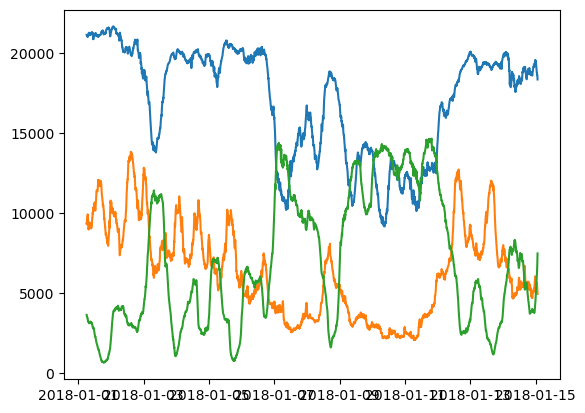

In [91]:
plt.plot(GenMix_cons_train['datetime'],data)

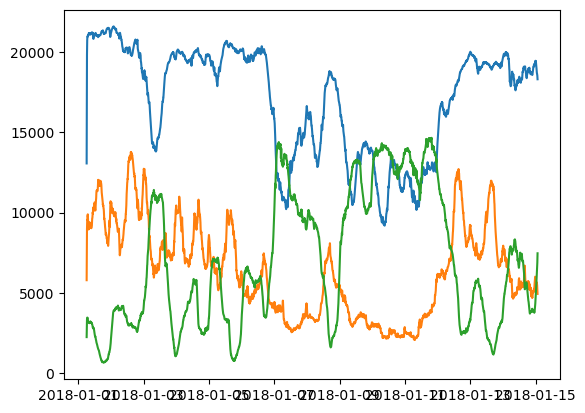

In [89]:
plt.plot(GenMix_cons_train['datetime'],filtered_state_means)

In [90]:
print_parameters(kf_all)

transition_matrices = [[ 9.98827587e-01  1.98576976e-03  9.98875802e-05]
 [-3.88073583e-04  1.00027791e+00  4.72446048e-04]
 [ 1.87600376e-03 -3.96049833e-03  9.98979911e-01]], shape = (3, 3)

observation_matrices = [[ 1.00152728e+00  3.88592201e-03 -3.00433568e-03]
 [-1.91382310e-04  1.00360164e+00 -9.53931106e-04]
 [ 1.34646892e-04  8.03672174e-04  9.99682821e-01]], shape = (3, 3)

transition_offsets = [7.97441271 1.31950445 1.70234563], shape = (3,)

observation_offsets = [13.15687601  5.81448101  2.21837733], shape = (3,)

transition_covariance = [[22300.3799126   8275.95701974   706.53853778]
 [ 8275.95701974 12457.95289649  -622.54414161]
 [  706.53853778  -622.54414161  6459.42502255]], shape = (3, 3)

observation_covariance = [[34203.63766793 14860.93946953  5765.24922891]
 [14860.93946953  7118.70195923  2484.94929326]
 [ 5765.24922891  2484.94929326  1290.77054139]], shape = (3, 3)

initial_state_mean = [13062.24498368  5787.13731919  2241.55772974], shape = (3,)

initial_sta

Still stayed close to identity transition and covariance matrices

In [92]:
filename = 'KF_CGS_3Latent_allfit.pkl'
outfile = open(filename,'wb')
pickle.dump(kf_all,outfile)
outfile.close()


In [93]:
KF_CGS_3Latent_allfit = kf_all

#### Plot Histograms

In [30]:
GenMix_cons_train.columns[2:]

Index(['Coal Total', 'Natural Gas Total', 'Wind Total', 'Hydro Total',
       'Nuclear Total'],
      dtype='object')

In [104]:
GenMix_cons_train

,GMT MKT Interval,datetime,Coal Total,Natural Gas Total,Wind Total,Hydro Total,Nuclear Total
0,2018-01-01T06:00:00Z,2018-01-01 06:00:00+00:00,21152.4,9351.5,3643.1,802.7,2033.8
1,2018-01-01T06:05:00Z,2018-01-01 06:05:00+00:00,21108.7,9310.2,3619.8,818.6,2034.4
2,2018-01-01T06:10:00Z,2018-01-01 06:10:00+00:00,21097.9,9462.8,3578.9,846.0,2034.0
3,2018-01-01T06:15:00Z,2018-01-01 06:15:00+00:00,21072.0,9501.1,3539.2,820.3,2034.4
4,2018-01-01T06:20:00Z,2018-01-01 06:20:00+00:00,21065.6,9620.9,3515.1,757.0,2034.5
...,...,...,...,...,...,...,...
3968,2018-01-15T01:10:00Z,2018-01-15 01:10:00+00:00,18646.8,5533.4,6444.2,1446.8,2035.7
3969,2018-01-15T01:15:00Z,2018-01-15 01:15:00+00:00,18658.0,5378.8,6626.1,1452.5,2036.2
3970,2018-01-15T01:20:00Z,2018-01-15 01:20:00+00:00,18617.4,5162.2,6907.1,1448.7,2037.0
3971,2018-01-15T01:25:00Z,2018-01-15 01:25:00+00:00,18454.0,5060.6,7205.9,1452.8,2037.0


Coal Total


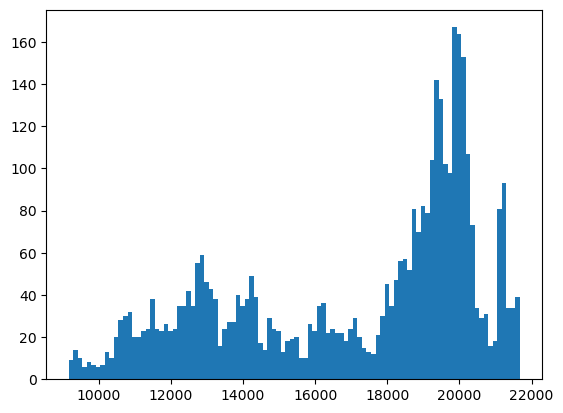

Natural Gas Total


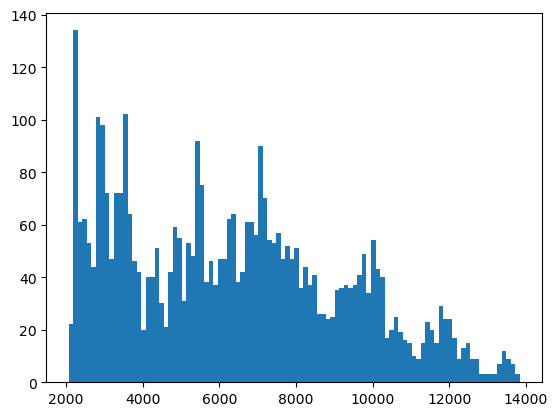

Wind Total


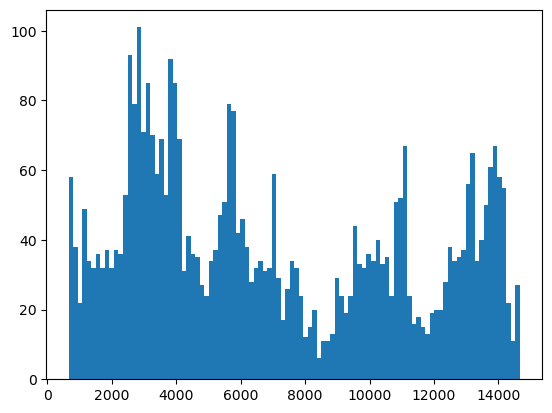

Hydro Total


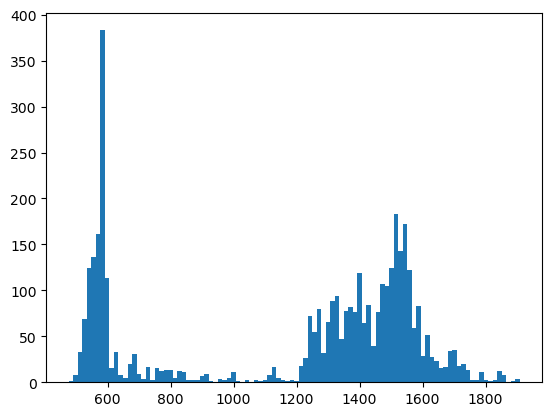

Nuclear Total


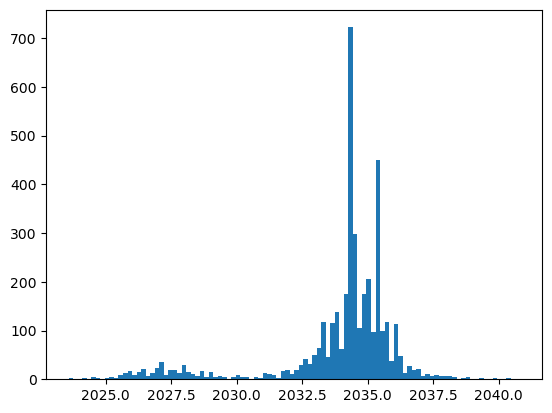

In [33]:
for column in GenMix_cons_train.columns[2:]:
    print(column)
    plt.hist(GenMix_cons_train[column],100)
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

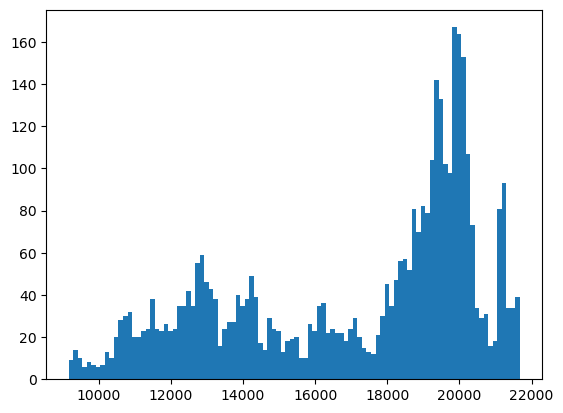

In [26]:
plt.hist(GenMix_cons_train['Coal Total'],100)
plt.show

Nuclear might be good for HMM

12/4

Kalman prediction: two approaches:

1. Filtering to predict latents from observations:
 
After training the Kalman filter on the training data (EM to optimize covariances), take new observations and keep filtering to find corresponding filtered latent estimates. Use $X_{t+1}$ to find $Z_{t+1}$ through filter_update.

Drawback: not really true prediction/forecast because we already use the observation. Good if we really want to know the latents.

2. Forecast the observations based on last filtered latent estimate:

As in lecture 5 and the midterm, from the last filtered latent in the training data, use the transition_matrix and observation_matrix to predict the next observation. Use $Z_t$ /$\mu_t$ to predict $X_{t+1}$ as $CA\mu_t$

Drawback: linear dynamics. With trivial identity matrices, just matches the naive forecast.

3rd approach: Simulation. Simulate, add in the white noise terms.
